# Introducción

En esta práctica vamos a repasar diferentes tests estadísticos. Para ello nos ayudamos de los datos publicados por BCSC:
*NCI-funded Breast Cancer Surveillance Consortium (P01 CA154292 and HHSN261201100031C). Downloaded mm/dd/yyyy from the Breast Cancer Surveillance Consortium Web site - http://www.bcsc-research.org/data/index.html.*

Concretamente a través de este enlace:
http://www.bcsc-research.org/data/rf/app2/DownloadRequest.aspx


El fichero *BCSC_risk_factors_summarized.csv* descargado lo teneis en la carpeta *data*.

Ese fichero es un CSV, la descripción de cada columna se puede ver en la siguiente tabla:


| Nombre de variable | Descripción | Código | 
|-|-|-|
| year | Año de la observación | Numérico, 2000-2009 |
| year_group_5_years| Edad (años) en grupos de 5 años |  1 = Edad 18-29;  2 = Edad 30-34; 3 = Edad 35-39; 4 = Edad 40-44; 5 = Edad 45-49; 6 = Edad 50-54; 7 = Edad 55-59; 8 = Edad 60-64; 9 = Edad 65-69; 10 = Edad 70-74; 11 = Edad 75-79; 12 = Edad 80-84; 13 = Edad ≥85 |
| race_eth | Grupo étnico | 1 = Non-Hispanic white; 2 = Non-Hispanic black; 3 = Asian/Pacific Islander; 4 = Native American; 5 = Hispanic; 6 = Other/mixed; 9 = Desconocido |
| first_degree_hx | Historial de cancer de un familiar de primer grado | 0 = No; 1 = Sí; 9 = Desconocido |
| Edad_menarche | Edad (años) at menarche |0 = Edad ≥14; 1 = Edad 12-13; 2 = Edad <12; 9 = Desconocido
| Edad_first_birth | Edad (años) at first birth | 0 = Edad < 20; 1 = Edad 20-24; 2 = Edad 25-29; 3 = Edad ≥30; 4 = Nulliparous; 9 = Desconocido |
| BIRADS_breast_density | BI-RADS densidad del cancer de pecho| 1 = Almost entirely fat; 2 =Scattered fibroglandular densities; 3 = Heterogeneously dense; 4 = Extremely dense; 9 = Desconocido |
| current_hrt | Uso de terapia de hormonas de reemplazo | 0 = No; 1 = Sí; 9 = Desconocido |
| menopaus | Menopausal status | 1 = Pre- or peri-menopausal; 2 = Post-menopausal; 3 = Surgical menopause; 9 = Desconocido |
| bmi_group |  Body mass index | 1 = 10-24.99; 2 = 25-29.99; 3 = 30-34.99; 4 = 35 or more; 9 = Desconocido |
| biophx | Biopsia previa o aspiración | 0 = No; 1 = Sí; 9 = Desconocido |
| breast_cancer_history | Cancer diagnosticado con anterioridad | 0 = No; 1 = Sí; 9 = Desconocido |
| count | Número de ocurrencias de estas covariables | Numérico|




Leemos los datos del csv y los adaptamos. Pasos a seguir:
1. Replicamos las filas indicadas por la columna *count*
2. Los datos son muy grandes, para agilizar la práctica nos quedamos con 5000 muestras elegidas con muestreo aleatorio simple. El resto se puede descartar.
3. Se adapta el resto

In [2]:
# Instalación y carga de librerías extras

#dir.create(file.path("~/R/x86_64-pc-linux-gnu-library/3.2"), recursive = T)
#install.packages(c("purrr"), lib = "~/R/x86_64-pc-linux-gnu-library/3.2", repos = 'https://cran.rstudio.com/', verbose = F)

library("ggplot2")
library("dplyr", lib.loc = "~/R/x86_64-pc-linux-gnu-library/3.2")
library("purrr", lib.loc = "~/R/x86_64-pc-linux-gnu-library/3.2")

In [3]:
# Leemos los datos del csv
BCSC_risk_factors_summarized <- read.csv("./datos/BCSC_risk_factors_summarized.csv", sep = ",", header = T)

In [4]:
# Replicamos las filas por la columna count
BCSC_risk_factors_summarized <- BCSC_risk_factors_summarized %>%
    split(.$year) %>% 
    map_df(slice, rep(1:n(), count))

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘bindrcpp’”

El número de filas tras replicar las filas indicadas por la columna *count* es de 6318638. Como este número es muy alto para la máquina virtual que tenemos vamos a realizar una muestreo aleatorio simple y nos quedaremos con 5000 filas. El resto se descartan.

*Nota:*Para el muestreo usad la semilla 12345, de esta forma todos tendresmos exactamente los mismos resultados.

In [5]:
#Definimos una semilla común para todos:
set.seed(12345)
#Utiliza muestreo aleatorio simple para quedarnos con 5000 muestras:
BCSC_risk_factors_summarized.sample <- BCSC_risk_factors_summarized %>%
    sample_n(5000, replace = FALSE)

Formatear el dataframe:
* Cambiamos los *Desconocido* por NA en las columnas "race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density", "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history"
* Convertimos a factores las columnas que vamos a necesitar

In [6]:
# Convertimos los desconocidos (9) en NA
columns_replace <- c("race_eth", "first_degree_hx", "age_menarche", "age_first_birth", "BIRADS_breast_density",
                     "current_hrt", "menopaus", "bmi_group", "biophx", "breast_cancer_history")

BCSC_risk_factors_summarized.sample <- BCSC_risk_factors_summarized.sample %>%
    mutate_at(.vars = columns_replace, .funs = funs(ifelse(. == 9, NA, .)))

# Creamos los factores de las columnas utilizadas
BCSC_risk_factors_summarized.sample$first_degree_hx <- factor(BCSC_risk_factors_summarized.sample$first_degree_hx,
                                                              labels = c("No", "Sí"))
BCSC_risk_factors_summarized.sample$BIRADS_breast_density <- factor(BCSC_risk_factors_summarized.sample$BIRADS_breast_density,
                                                                    labels = c("Almost entirely fat",
                                                                               "Scattered fibroglandular densities",
                                                                               "Heterogeneously dense",
                                                                               "Extremely dense"))
BCSC_risk_factors_summarized.sample$race_eth <- factor(BCSC_risk_factors_summarized.sample$race_eth,
                                                       labels = c("Non-Hispanic white", "Non-Hispanic black",
                                                                  "Asian/Pacific Islander", "Native American",
                                                                  "Hispanic", "Other/mixed"))

#### Edad y Antecedentes familiares

Creamos una nueva columna con la edad estimada para un posterior análisis

Representa en un diagrama de cajas cómo varía la **edad de aparición del cancer** en función de si ha habido **antecedentes familiares** o no.
Ayuda:
- Hay que crear una nueva columna con la edad estimada de cada rango.

In [7]:
# Creamos una columna con la edad estimada
BCSC_risk_factors_summarized.sample$edad_estimada <- factor(BCSC_risk_factors_summarized.sample$age_group_5_years,
                                                            labels = c(mean(18:29), seq(32, 87, 5)))

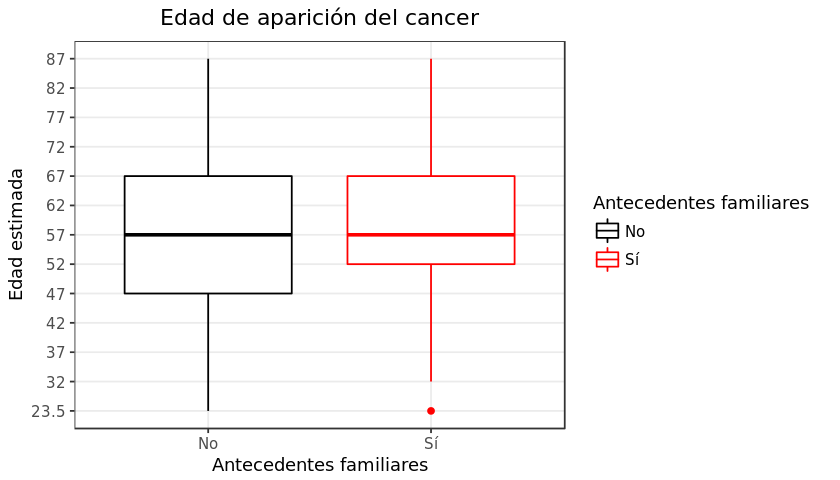

In [8]:
# Filtramos los valores desconocidos de la columna first_degree_hx de la muestra
BCSC_risk_factors_summarized.sample.first_degree_hx <- BCSC_risk_factors_summarized.sample %>%
    filter(!is.na(first_degree_hx))

options(repr.plot.height = 4, repr.plot.width = 7)

# Diagrama de cajas
ggplot(data = BCSC_risk_factors_summarized.sample.first_degree_hx) +
    geom_boxplot(aes(x = first_degree_hx, y = edad_estimada, color = first_degree_hx, group = first_degree_hx)) +
    labs(title = "Edad de aparición del cancer", x = "Antecedentes familiares", y = "Edad estimada") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_colour_manual(values = factor(c("No", "Sí")), name = "Antecedentes familiares")

options(repr.plot.height = 7, repr.plot.width = 7)

¿Existe una diferencia estadística significativa entre la edad de aparición del cancer y si hay antecedentes familiares? ¿Que test usarías para comprobarlo?

In [9]:
# Convertimos la columna edad_estimada en numérico para poder trabajar en los test
BCSC_risk_factors_summarized.sample.first_degree_hx <- BCSC_risk_factors_summarized.sample.first_degree_hx %>%
    mutate_at(.vars = "edad_estimada", .funs = funs(as.numeric(levels(.))[.]))

In [10]:
# Comprobamos que sean una distribución normal
paste("Los datos de edad estimada sin antecendetes familiares no se parecen a una gaussiana. p-valor:",
      shapiro.test((BCSC_risk_factors_summarized.sample.first_degree_hx %>%
                        filter(first_degree_hx == "No"))$edad_estimada)$p.value)
paste("Los datos de edad estimada con antecendetes familiares no se parecen a una gaussiana. p-valor:",
      shapiro.test((BCSC_risk_factors_summarized.sample.first_degree_hx %>%
                        filter(first_degree_hx == "Sí"))$edad_estimada)$p.value)

paste("Test de Wilcoxon-Mann-Whitney. p-valor:",
      wilcox.test(edad_estimada ~ first_degree_hx, data = BCSC_risk_factors_summarized.sample.first_degree_hx)$p.value,
      "Por lo que podemos afirmar que existe una diferencia estadística significativa.")

[1] "Los datos de edad estimada sin antecendetes familiares no se parecen a una gaussiana. p-valor: 4.84326266206407e-31"

[1] "Los datos de edad estimada con antecendetes familiares no se parecen a una gaussiana. p-valor: 4.64497763971181e-11"

[1] "Test de Wilcoxon-Mann-Whitney. p-valor: 2.33852483042442e-06 Por lo que podemos afirmar que existe una diferencia estadística significativa."

Dibuja la curva de densidad de probabilidad de cómo varía la edad de aparición del cancer en función de si ha habido antecedentes familiares o no.

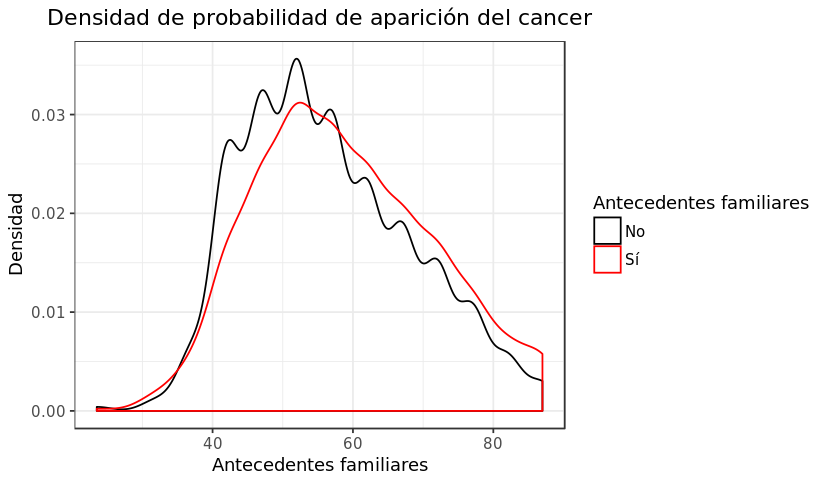

In [11]:
options(repr.plot.height = 4, repr.plot.width = 7)

# Diagrama de densidad
ggplot(data = BCSC_risk_factors_summarized.sample.first_degree_hx) +
    geom_density(aes(x = edad_estimada, color = first_degree_hx, group = first_degree_hx)) +
    labs(title = "Densidad de probabilidad de aparición del cancer", x = "Antecedentes familiares", y = "Densidad") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) +
    scale_colour_manual(values = factor(c("No", "Sí")), name = "Antecedentes familiares")

options(repr.plot.height = 7, repr.plot.width = 7)

#### Edad y BIRADS

Representa en un diagrama de cajas cómo varía la edad de aparición del cancer en función de la densidad del cancer (BIRADS).

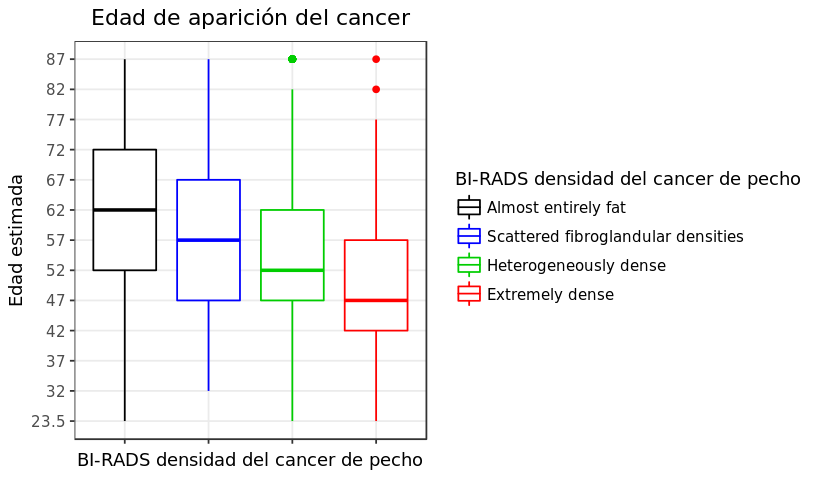

In [12]:
# Filtramos los valores desconocidos de la columna BIRADS_breast_density de la muestra
BCSC_risk_factors_summarized.sample.BIRADS_breast_density <- BCSC_risk_factors_summarized.sample %>%
    filter(!is.na(BIRADS_breast_density))

options(repr.plot.height = 4, repr.plot.width = 7)

# Diagrama de cajas
ggplot(data = BCSC_risk_factors_summarized.sample.BIRADS_breast_density) +
    geom_boxplot(aes(x = BIRADS_breast_density, y = edad_estimada, color = BIRADS_breast_density, group = BIRADS_breast_density)) +
    labs(title = "Edad de aparición del cancer", x = "BI-RADS densidad del cancer de pecho", y = "Edad estimada") +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5), axis.text.x = element_blank()) +
    scale_colour_manual(values = factor(c("Almost entirely fat", "Scattered fibroglandular densities",
                                          "Heterogeneously dense", "Extremely dense")),
                        name = "BI-RADS densidad del cancer de pecho")

options(repr.plot.height = 7, repr.plot.width = 7)

¿Existe una evidencia estadística significativa para decir que la edad en la que se detecta el cancer depende de la densidad del cancer (BIRADS)?

¿Que test habría que aplicar?

In [13]:
# Convertimos la columna edad_estimada en numérico para poder trabajar en los test
BCSC_risk_factors_summarized.sample.BIRADS_breast_density <- BCSC_risk_factors_summarized.sample.BIRADS_breast_density %>%
    mutate_at(.vars = "edad_estimada", .funs = funs(as.numeric(levels(.))[.]))

In [14]:
# Comprobamos que sean una distribución normal
paste("Los datos de edad estimada con densidad",
      c("Almost entirely fat", "Scattered fibroglandular densities", "Heterogeneously dense", "Extremely dense"),
      "no se parecen a una gaussiana. p-valor:",
      c(shapiro.test((BCSC_risk_factors_summarized.sample.BIRADS_breast_density %>%
                          filter(BIRADS_breast_density == "Almost entirely fat"))$edad_estimada)$p.value,
        shapiro.test((BCSC_risk_factors_summarized.sample.BIRADS_breast_density %>%
                          filter(BIRADS_breast_density == "Scattered fibroglandular densities"))$edad_estimada)$p.value,
        shapiro.test((BCSC_risk_factors_summarized.sample.BIRADS_breast_density %>%
                          filter(BIRADS_breast_density == "Heterogeneously dense"))$edad_estimada)$p.value,
        shapiro.test((BCSC_risk_factors_summarized.sample.BIRADS_breast_density %>%
                          filter(BIRADS_breast_density == "Extremely dense"))$edad_estimada)$p.value))

paste("Test de Kruskal-Wallis. p-valor:",
      kruskal.test(edad_estimada ~ BIRADS_breast_density, data = BCSC_risk_factors_summarized.sample.BIRADS_breast_density)$p.value,
      "Por lo que podemos afirmar que existe una diferencia estadística significativa.")

[1] "Los datos de edad estimada con densidad Almost entirely fat no se parecen a una gaussiana. p-valor: 0.000153769952512035"              
[2] "Los datos de edad estimada con densidad Scattered fibroglandular densities no se parecen a una gaussiana. p-valor: 4.7377089605984e-20"
[3] "Los datos de edad estimada con densidad Heterogeneously dense no se parecen a una gaussiana. p-valor: 1.30447149217044e-20"            
[4] "Los datos de edad estimada con densidad Extremely dense no se parecen a una gaussiana. p-valor: 2.956301763985e-09"

[1] "Test de Kruskal-Wallis. p-valor: 1.21834204578165e-33 Por lo que podemos afirmar que existe una diferencia estadística significativa."

#### Tablas de contingencia: BIRADS

¿Todos los  tipos de cancer (BIRADS) son igual de probables? ¿Con que test lo comprobarías?

In [15]:
paste("Con Chi cuadrado realizmos un test de homogeneidad.",
      "Dado que p-valor es:",
      chisq.test((BCSC_risk_factors_summarized.sample %>%
                      filter(!is.na(BIRADS_breast_density)) %>%
                      group_by(BIRADS_breast_density) %>%
                      summarise(cases = n()))$cases)$p.value,
      "es muy bajo. Podemos afirmar que no son todas igual de probables.")

[1] "Con Chi cuadrado realizmos un test de homogeneidad. Dado que p-valor es: 0 es muy bajo. Podemos afirmar que no son todas igual de probables."

¿Cual es el tipo de cancer (BIRADS) más común? ¿Con qué proporción?

In [16]:
cancer <- BCSC_risk_factors_summarized.sample %>%
    filter(!is.na(BIRADS_breast_density)) %>%
    group_by(BIRADS_breast_density) %>%
    summarise(cases = n()) %>%
    mutate(ratio = cases / sum(cases) * 100) %>%
    top_n(n = 1, wt = ratio)

paste("El tipo de cancer (BIRADS) más común es ", cancer$BIRADS_breast_density,
      "con proporción", round(cancer$ratio, 2), "%")

[1] "El tipo de cancer (BIRADS) más común es  Scattered fibroglandular densities con proporción 45.38 %"

¿Depende el tipo de cancer (BIRADS) de si ha habido o no antecedentes familiares?

In [17]:
paste("Con Chi cuadrado realizmos un test de independencia",
      "Dado que p-valor:",
      chisq.test(table(BCSC_risk_factors_summarized.sample$first_degree_hx,
                       BCSC_risk_factors_summarized.sample$BIRADS_breast_density))$p.value,
      "es alto. Podemos afirmar que no depende el tipo de cancer de si ha habido o no antecedentes familiares.")

[1] "Con Chi cuadrado realizmos un test de independencia Dado que p-valor: 0.235951995918296 es alto. Podemos afirmar que no depende el tipo de cancer de si ha habido o no antecedentes familiares."

¿Depende el tipo de cancer BIRADS del grupo étnico?

In [18]:
paste("Con Chi cuadrado realizmos un test de independencia",
      "Dado que p-valor:",
      chisq.test(table(BCSC_risk_factors_summarized.sample$race_eth,
                       BCSC_risk_factors_summarized.sample$BIRADS_breast_density), simulate.p.value = T)$p.value,
      "es bajo. Podemos afirmar que si depende el tipo de cancer del grupo étnico.")


[1] "Con Chi cuadrado realizmos un test de independencia Dado que p-valor: 0.000499750124937531 es bajo. Podemos afirmar que si depende el tipo de cancer del grupo étnico."

¿Cual es la probabilidad (con su margen de error del 95%) de que un *Native American* tenga un cancer de tipo *Almost entirely fat*?

*Aviso*: Cuidado con los NA

In [19]:
# Filtramos los desconocidos, por Native American y los tipos de cancer
BCSC_risk_factors_summarized.sample.filter_na <- BCSC_risk_factors_summarized.sample %>%
    filter(!is.na(BIRADS_breast_density) & !is.na(race_eth))

a <- BCSC_risk_factors_summarized.sample.filter_na %>%
    filter(race_eth == "Native American" & BIRADS_breast_density == "Almost entirely fat") %>%
    summarise(total = n())

b <- BCSC_risk_factors_summarized.sample.filter_na %>%
    filter(race_eth == "Native American" & BIRADS_breast_density != "Almost entirely fat") %>%
    summarise(total = n())

c <- BCSC_risk_factors_summarized.sample.filter_na %>%
    filter(race_eth != "Native American" & BIRADS_breast_density == "Almost entirely fat") %>%
    summarise(total = n())

d <- BCSC_risk_factors_summarized.sample.filter_na %>%
    filter(race_eth != "Native American" & BIRADS_breast_density != "Almost entirely fat") %>%
    summarise(total = n())

n <- sum(c(a$total, b$total))
ns <- a$total
test <- binom.test(ns, n, conf.level = 0.95)

paste("La probabilidad de que un Native American tenga un cancer de tipo Almost entirely fat es de",
      round(test$estimate * 100, 2), "%")
paste0("Intervalo de confianza del 95%: [", round(test$conf.int[1] * 100, 2), ", ", round(test$conf.int[2] * 100, 2), "]")

[1] "La probabilidad de que un Native American tenga un cancer de tipo Almost entirely fat es de 5.88 %"

[1] "Intervalo de confianza del 95%: [0.15, 28.69]"